In [39]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np

from models.scripts.utils import load_csv, split_date, create_lags, add_seasonality

In [40]:
file_path = 'data/xmr_lunarcrush_timeseries.csv'

df = load_csv(file_path)
df = split_date(df, 'time')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38656 entries, 0 to 38655
Data columns (total 61 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   asset_id                 38656 non-null  int64         
 1   timestamp                38656 non-null  int64         
 2   time                     38656 non-null  datetime64[ns]
 3   open                     38656 non-null  float64       
 4   close                    38656 non-null  float64       
 5   high                     38656 non-null  float64       
 6   low                      38656 non-null  float64       
 7   volume                   29984 non-null  float64       
 8   volume_24h               38656 non-null  float64       
 9   market_cap               38656 non-null  float64       
 10  circulating_supply       38656 non-null  float64       
 11  url_shares               38646 non-null  float64       
 12  unique_url_shares        38646 n

In [41]:
# Calculate the mean close price per month
monthly_mean = df.groupby(['month'])['close'].mean().reset_index()

# Calculate the mean close price per year
yearly_mean = df.groupby(['year'])['close'].mean().reset_index()

In [42]:
def plot_monthly_mean(df, year, month, value):
    """
    Plots the monthly mean of a specified column, using separate year and month columns.

    Parameters:
    - df: pandas DataFrame containing the data.
    - year_column: str, the name of the column containing year information.
    - month_column: str, the name of the column containing month information.
    - value_column: str, the name of the column for which to calculate and plot the monthly mean.
    """
    # Grouping by year and month to calculate the monthly mean
    monthly_mean = df.groupby([year, month])[value].mean().reset_index()

    # Creating a 'Year-Month' column for plotting
    monthly_mean['Year-Month'] = monthly_mean[year].astype(str) + '-' + monthly_mean[month].astype(str)

    # Plotting
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=monthly_mean, x='Year-Month', y=value, marker='o')

    plt.title(f'Mean {value} per Month')
    plt.xlabel('Month')
    plt.ylabel(f'Mean {value}')

    plt.xticks(rotation=45)  # Rotate the x labels for better readability
    plt.grid(True)

    plt.tight_layout()
    plt.show()


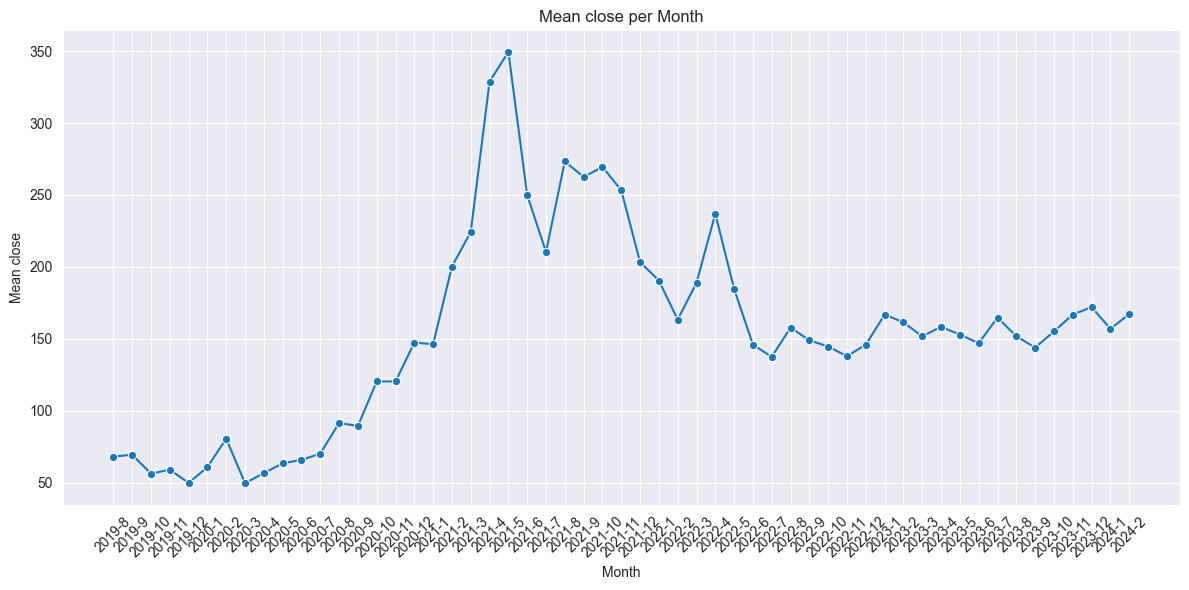

In [43]:
plot_monthly_mean(df, 'year', 'month', 'close')

### Fourier Transform

In [44]:
# Fourier Transform
from numpy.fft import rfft

# Choose a relevant column, for example, 'Close'
data = df['close'].values

# Apply Fourier Transform
fourier_transform = rfft(data)

# Get frequencies
frequencies = np.fft.rfftfreq(len(data), d=1)  # d is the sample spacing
amplitudes = np.abs(fourier_transform)

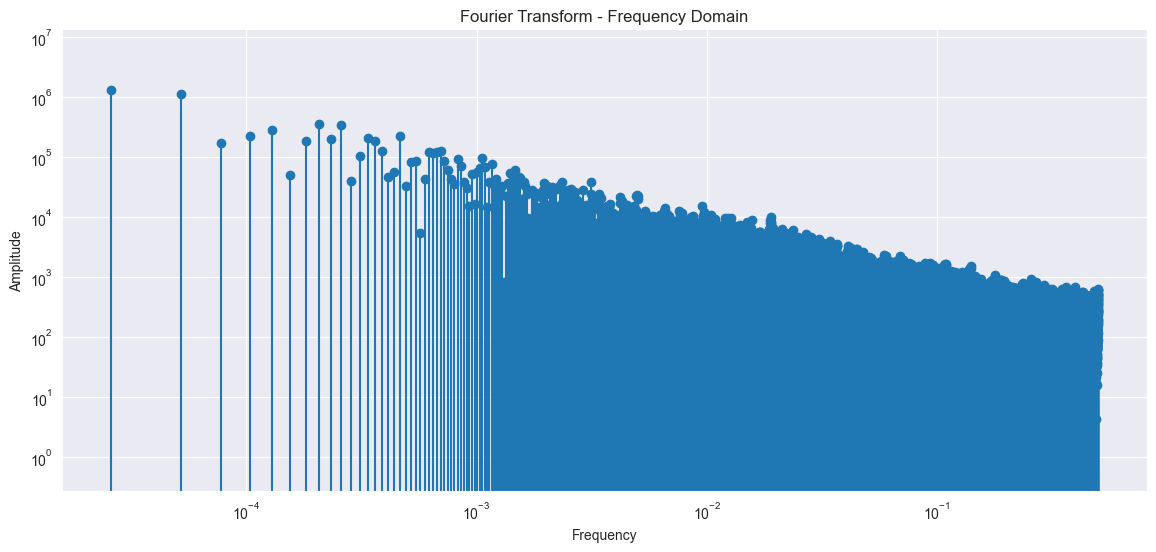

In [45]:
plt.figure(figsize=(14, 6))
plt.stem(frequencies, amplitudes)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Fourier Transform - Frequency Domain')
plt.show()

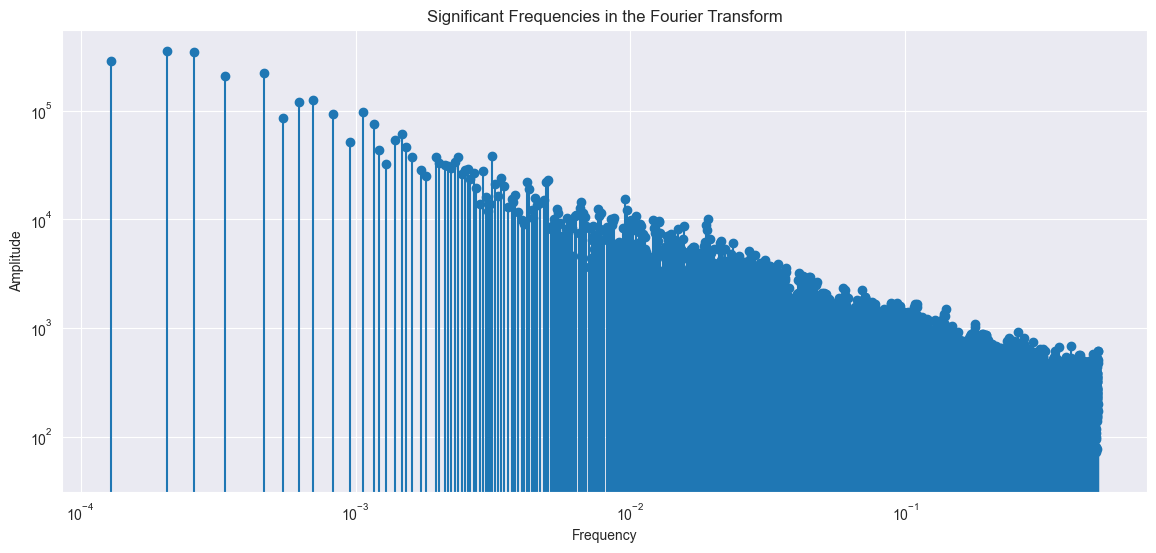

Frequency: 0.00012934602649006624, Period: 7731.2 (time units)
Frequency: 0.00020695364238410596, Period: 4832.0 (time units)
Frequency: 0.00025869205298013247, Period: 3865.6 (time units)
Frequency: 0.00033629966887417217, Period: 2973.538461538462 (time units)
Frequency: 0.0004656456953642384, Period: 2147.5555555555557 (time units)
Frequency: 0.0005432533112582781, Period: 1840.7619047619048 (time units)
Frequency: 0.0006208609271523179, Period: 1610.6666666666665 (time units)
Frequency: 0.0006984685430463576, Period: 1431.7037037037037 (time units)
Frequency: 0.0008278145695364238, Period: 1208.0 (time units)
Frequency: 0.0009571605960264901, Period: 1044.7567567567567 (time units)
Frequency: 0.001060637417218543, Period: 942.829268292683 (time units)
Frequency: 0.0011641142384105961, Period: 859.0222222222221 (time units)
Frequency: 0.0012158526490066224, Period: 822.468085106383 (time units)
Frequency: 0.0012934602649006624, Period: 773.1199999999999 (time units)
Frequency: 0.001

In [46]:
from scipy.signal import find_peaks

# Find Peaks in the Amplitudes to Identify Significant Frequencies
peaks, _ = find_peaks(amplitudes, height=0)  # Adjust height as needed to filter out noise

# Extract Frequencies corresponding to the Peaks
significant_freqs = frequencies[peaks]
significant_amps = amplitudes[peaks]

# Optional - Plot the Frequencies and Amplitudes
plt.figure(figsize=(14, 6))
plt.stem(significant_freqs, significant_amps)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Significant Frequencies in the Fourier Transform')
plt.show()

# Convert Frequencies to Time Periods
significant_periods = 1 / significant_freqs

# Print the significant frequencies and their corresponding periods
for freq, period in zip(significant_freqs, significant_periods):
    print(f"Frequency: {freq}, Period: {period} (time units)")

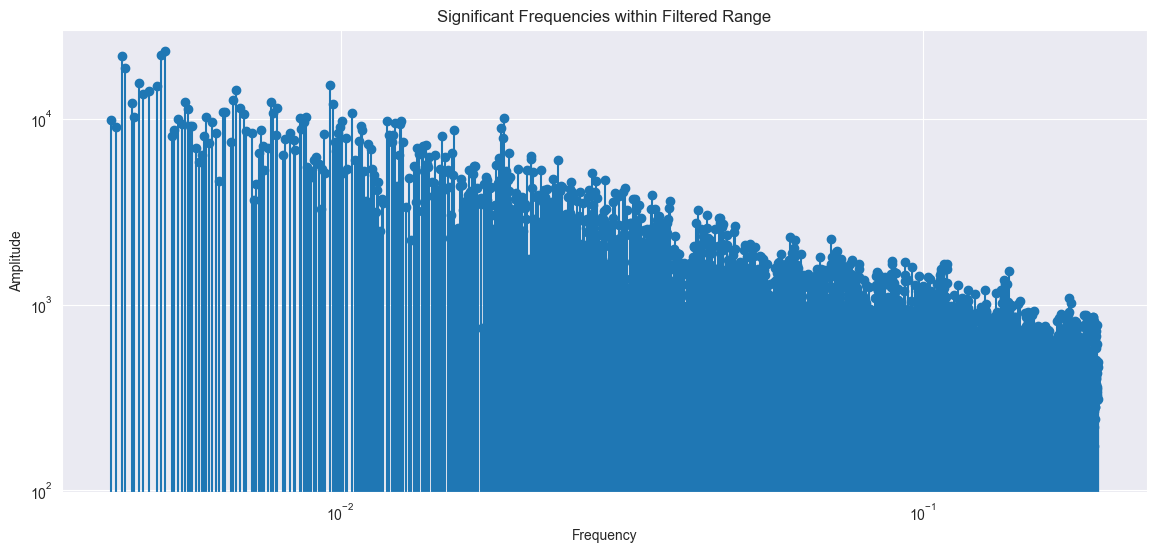

Frequency: 0.004035596026490066, Period: 247.7948717948718 (time units)
Frequency: 0.004113203642384106, Period: 243.11949685534591 (time units)
Frequency: 0.004216680463576159, Period: 237.15337423312883 (time units)
Frequency: 0.0042684188741721855, Period: 234.27878787878788 (time units)
Frequency: 0.004371895695364238, Period: 228.7337278106509 (time units)
Frequency: 0.004423634105960265, Period: 226.05847953216374 (time units)
Frequency: 0.004501241721854304, Period: 222.1609195402299 (time units)
Frequency: 0.004578849337748344, Period: 218.3954802259887 (time units)
Frequency: 0.004682326158940397, Period: 213.5690607734807 (time units)
Frequency: 0.004837541390728477, Period: 206.71657754010693 (time units)
Frequency: 0.0049151490066225165, Period: 203.45263157894738 (time units)
Frequency: 0.004992756622516557, Period: 200.29015544041448 (time units)
Frequency: 0.005122102649006623, Period: 195.23232323232324 (time units)
Frequency: 0.005173841059602649, Period: 193.279999999

In [47]:
# Define Frequency Range for Filtering
min_freq = 1 / 252
max_freq = 1 / 5

# Filter out frequencies outside this range
filtered_indices = np.where((frequencies >= min_freq) & (frequencies <= max_freq))
filtered_freqs = frequencies[filtered_indices]
filtered_amps = amplitudes[filtered_indices]

# Find Peaks within the Filtered Frequencies
peaks, _ = find_peaks(filtered_amps, height=0)  # Adjust height as needed

# Extract Frequencies and Amplitudes of the Peaks
significant_freqs = filtered_freqs[peaks]
significant_amps = filtered_amps[peaks]

# Plot the Filtered Frequencies and Amplitudes
plt.figure(figsize=(14, 6))
plt.stem(significant_freqs, significant_amps)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Significant Frequencies within Filtered Range')
plt.show()

# Convert Frequencies to Time Periods
significant_periods = 1 / significant_freqs

# Print the significant frequencies and their corresponding periods
for freq, period in zip(significant_freqs, significant_periods):
    print(f"Frequency: {freq}, Period: {period} (time units)")

In [48]:
# Convert Frequencies to Periods
significant_periods = 1 / significant_freqs

monthly_range = range(17, 23)
# yearly_range = range(245, 256)

# Interpretation
for freq, period in zip(significant_freqs, significant_periods):
    # Approximate the period to the nearest integer for easier interpretation
    approx_period = round(period)

    if approx_period in monthly_range:
        print(f"Frequency: {freq} - Pattern with period of {approx_period} days")

Frequency: 0.04449503311258278 - Pattern with period of 22 days
Frequency: 0.04459850993377484 - Pattern with period of 22 days
Frequency: 0.04465024834437086 - Pattern with period of 22 days
Frequency: 0.04470198675496689 - Pattern with period of 22 days
Frequency: 0.04485720198675497 - Pattern with period of 22 days
Frequency: 0.044908940397350994 - Pattern with period of 22 days
Frequency: 0.045012417218543044 - Pattern with period of 22 days
Frequency: 0.045064155629139076 - Pattern with period of 22 days
Frequency: 0.04514176324503311 - Pattern with period of 22 days
Frequency: 0.04524524006622516 - Pattern with period of 22 days
Frequency: 0.04534871688741722 - Pattern with period of 22 days
Frequency: 0.045400455298013245 - Pattern with period of 22 days
Frequency: 0.04547806291390728 - Pattern with period of 22 days
Frequency: 0.04555567052980133 - Pattern with period of 22 days
Frequency: 0.04560740894039735 - Pattern with period of 22 days
Frequency: 0.0457108857615894 - Patt

/Users/lucapetracca/anaconda3/envs/dmts/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/lucapetracca/anaconda3/envs/dmts/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


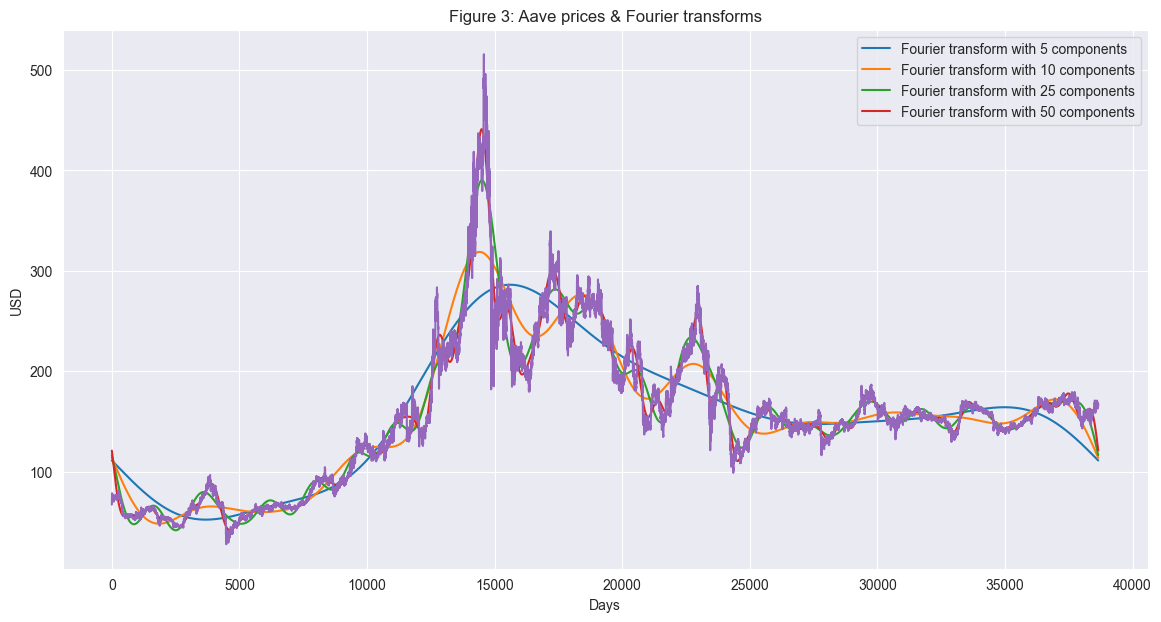

In [50]:
close_fft = np.fft.fft(np.asarray(df['close'].tolist()))
fft_df = pd.DataFrame({'fft':close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))
plt.figure(figsize=(14, 7), dpi=100)
fft_list = np.asarray(fft_df['fft'].tolist())
for num_ in [5, 10, 25, 50]:
    fft_list_m10= np.copy(fft_list); fft_list_m10[num_:-num_]=0
    plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_))
plt.plot( df['close'])
plt.xlabel('Days')
plt.ylabel('USD')
plt.title('Figure 3: Aave prices & Fourier transforms')
plt.legend()
plt.show()

### Lag Features

In [51]:
lag_df = create_lags(df, 3)

In [52]:
lag_df.head()

,asset_id,timestamp,time,open,close,high,low,volume,volume_24h,market_cap,...,market_cap_global,market_dominance,daily_price_change,week,day,month,year,lag_1,lag_2,lag_3
0,13,1567036800,2019-08-29,72.37,67.28,72.46,67.13,1741238.0,68778555.58,1.157065e+09,...,2.332637e+11,0.421833,-5.09,35,29,8,2019,67.28,67.28,67.28
1,13,1567123200,2019-08-30,66.69,68.75,70.00,66.17,1741238.0,68778555.58,1.166732e+09,...,2.332637e+11,0.421833,2.06,35,30,8,2019,67.28,67.28,67.28
2,13,1567209600,2019-08-31,68.65,68.07,69.95,66.76,1741238.0,68778555.58,1.160993e+09,...,2.332637e+11,0.421833,-0.58,35,31,8,2019,68.75,67.28,67.28
3,13,1567296000,2019-09-01,68.13,71.88,74.82,67.49,1741238.0,68778555.58,1.235596e+09,...,2.332637e+11,0.421833,3.75,35,1,9,2019,68.07,68.75,67.28
4,13,1567382400,2019-09-02,72.05,73.63,74.42,70.20,1741238.0,68778555.58,1.260071e+09,...,2.332637e+11,0.421833,1.58,36,2,9,2019,71.88,68.07,68.75


### Seasonality Index

In [53]:
df = add_seasonality(df)
df.head(100)

,asset_id,timestamp,time,open,close,high,low,volume,volume_24h,market_cap,...,market_cap_global,market_dominance,daily_price_change,week,day,month,year,Month_Category_Bearish,Month_Category_Bullish,Month_Category_Normal
0,13,1567036800,2019-08-29 00:00:00,72.370000,67.280000,72.460000,67.130000,1741238.0,68778555.58,1.157065e+09,...,2.332637e+11,0.421833,-5.090000,35,29,8,2019,0.0,1.0,0.0
1,13,1567123200,2019-08-30 00:00:00,66.690000,68.750000,70.000000,66.170000,1741238.0,68778555.58,1.166732e+09,...,2.332637e+11,0.421833,2.060000,35,30,8,2019,0.0,1.0,0.0
2,13,1567209600,2019-08-31 00:00:00,68.650000,68.070000,69.950000,66.760000,1741238.0,68778555.58,1.160993e+09,...,2.332637e+11,0.421833,-0.580000,35,31,8,2019,0.0,1.0,0.0
3,13,1567296000,2019-09-01 00:00:00,68.130000,71.880000,74.820000,67.490000,1741238.0,68778555.58,1.235596e+09,...,2.332637e+11,0.421833,3.750000,35,1,9,2019,0.0,0.0,1.0
4,13,1567382400,2019-09-02 00:00:00,72.050000,73.630000,74.420000,70.200000,1741238.0,68778555.58,1.260071e+09,...,2.332637e+11,0.421833,1.580000,36,2,9,2019,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,13,1568257200,2019-09-12 03:00:00,71.938931,71.967157,72.302328,71.751859,2155972.0,68778555.58,1.237816e+09,...,2.332637e+11,0.421833,0.028226,37,12,9,2019,0.0,0.0,1.0
96,13,1568260800,2019-09-12 04:00:00,71.779927,72.245405,72.313797,71.650001,2154568.0,68778555.58,1.242867e+09,...,2.332637e+11,0.421833,0.465478,37,12,9,2019,0.0,0.0,1.0
97,13,1568264400,2019-09-12 05:00:00,72.323617,72.400705,72.557264,72.282695,2078944.0,68778555.58,1.244445e+09,...,2.332637e+11,0.421833,0.077088,37,12,9,2019,0.0,0.0,1.0
98,13,1568268000,2019-09-12 06:00:00,72.216702,71.890736,72.310147,71.763638,2281429.0,68778555.58,1.235999e+09,...,2.332637e+11,0.421833,-0.325966,37,12,9,2019,0.0,0.0,1.0


## Autocorrelation

Autocorrelation measures the linear relationship between lagged values of a time series. If a series is significantly autocorrelated, that means, the previous values of the series (lags) may be helpful in predicting the current value.

In [54]:
df.set_index('time', inplace=True)
monthly_df = df['close'].resample('M').mean()

In [55]:
monthly_df

time
2019-08-31     68.033333
2019-09-30     69.393002
2019-10-31     56.171978
2019-11-30     58.996282
2019-12-31     49.760500
2020-01-31     60.676555
2020-02-29     80.569296
2020-03-31     49.617098
2020-04-30     56.533103
2020-05-31     63.394244
2020-06-30     65.737335
2020-07-31     70.100991
2020-08-31     91.452398
2020-09-30     89.348635
2020-10-31    120.318554
2020-11-30    120.312834
2020-12-31    147.342217
2021-01-31    146.268488
2021-02-28    200.228087
2021-03-31    224.351852
2021-04-30    328.897307
2021-05-31    349.476895
2021-06-30    249.993672
2021-07-31    210.314222
2021-08-31    273.432874
2021-09-30    262.485282
2021-10-31    269.561082
2021-11-30    253.289797
2021-12-31    203.353803
2022-01-31    190.517542
2022-02-28    163.313552
2022-03-31    188.985751
2022-04-30    237.009519
2022-05-31    184.582429
2022-06-30    145.874891
2022-07-31    137.442217
2022-08-31    157.818417
2022-09-30    148.944080
2022-10-31    144.589303
2022-11-30    137.87

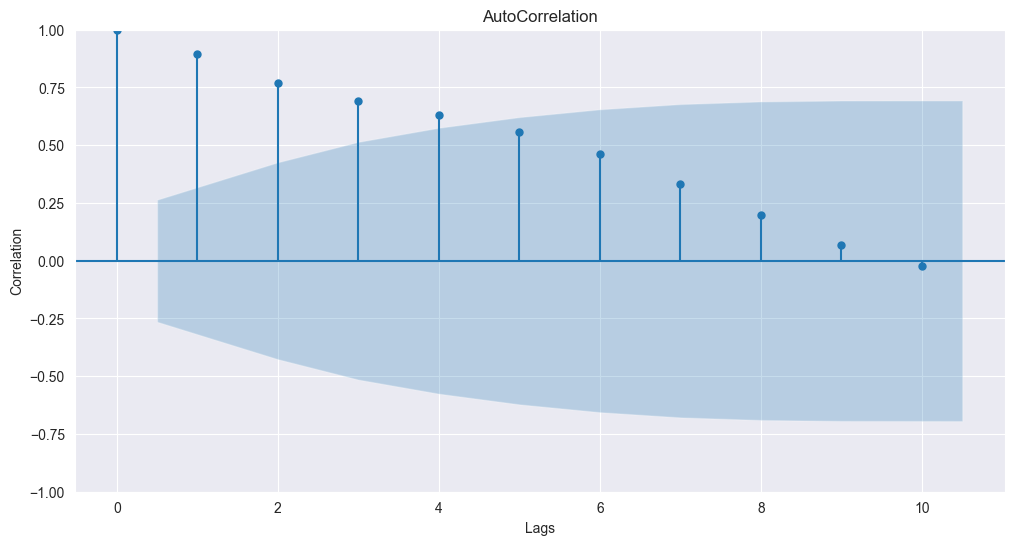

In [56]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))

# AutoCorrelation
plot_acf(monthly_df, lags=10, ax=ax) 
ax.set_title('AutoCorrelation')
ax.set_ylabel('Correlation')
ax.set_xlabel('Lags')

plt.show()

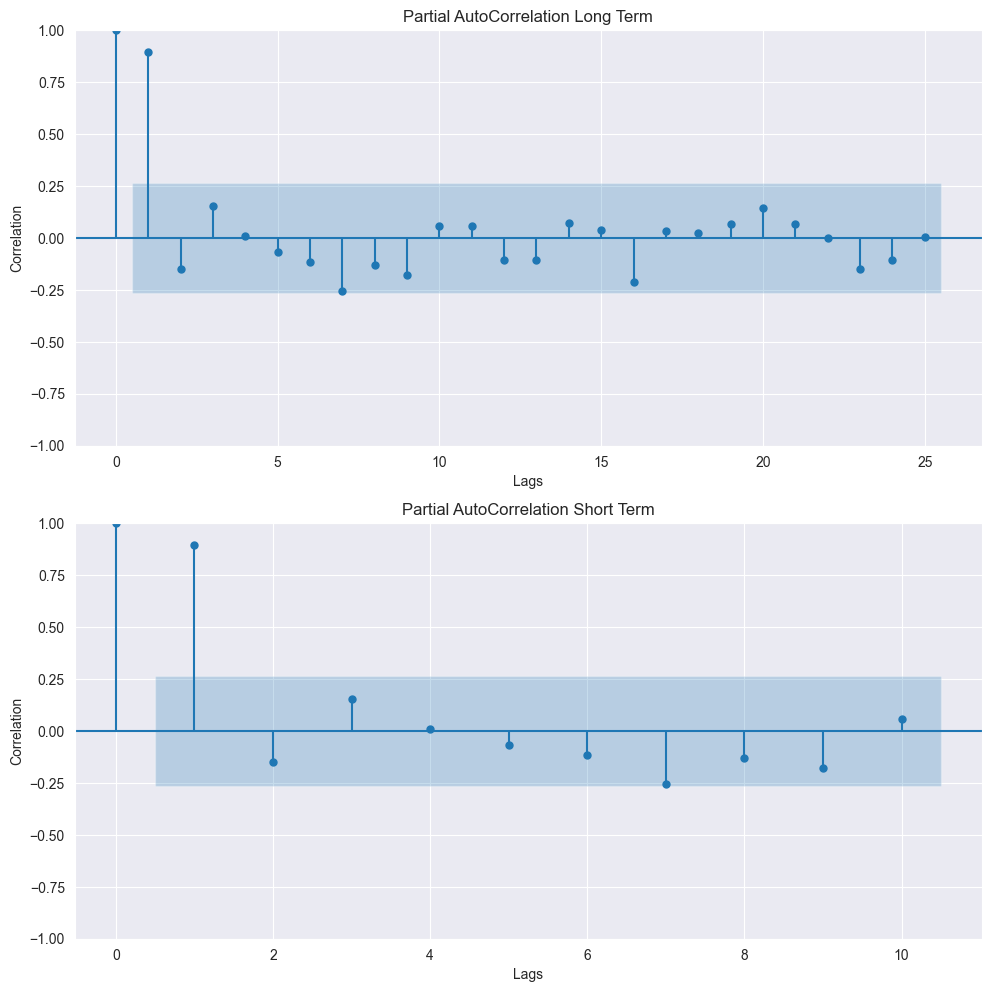

In [58]:
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 10))

# Partial AutoCorrelation for Long Term
pacf = plot_pacf(monthly_df, lags=25, ax=ax1)
ax1.set_title('Partial AutoCorrelation Long Term')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')

# Partial AutoCorrelation for Short Term
pacf = plot_pacf(monthly_df, lags=10, ax=ax2)
ax2.set_title('Partial AutoCorrelation Short Term')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')

plt.tight_layout(pad=1)
plt.show()